# <font color='#b62705'>LOGISTIC REGRESSION : BANK DATA

## <font color='#3728c8'> PROBLEM STATEMENT

## To Predict Whether the client has subscribed a term deposit or not

## <font color='#591071'> Attribute information For bank dataset

   ## <font color='#9a286f'> Input variables:
   
   ### bank client data:
   + 1 - age (numeric)
   + 2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
                                       "blue-collar","self-employed","retired","technician","services") 
   + 3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
   + 4 - education (categorical: "unknown","secondary","primary","tertiary")
   + 5 - default: has credit in default? (binary: "yes","no")
   + 6 - balance: average yearly balance, in euros (numeric) 
   + 7 - housing: has housing loan? (binary: "yes","no")
   + 8 - loan: has personal loan? (binary: "yes","no")
   ### related with the last contact of the current campaign:
   + 9 - contact: contact communication type (categorical: "unknown","telephone","cellular") 
  + 10 - day: last contact day of the month (numeric)
  + 11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
  + 12 - duration: last contact duration, in seconds (numeric)
   ### other attributes:
  + 13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
  + 14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
  + 15 - previous: number of contacts performed before this campaign and for this client (numeric)
  + 16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

  ### Output variable (desired target):
  + 17 - y - has the client subscribed a term deposit? (binary: "yes","no")

### Missing Attribute Values: None


In [1]:
##import the libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Reading the csv
bank = pd.read_csv('bank-full.csv', sep= ';')
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
#shape of dataset
bank.shape

(45211, 17)

In [4]:
#info() will provide a summary of the DataFrame's structure and content.

bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


### NO NULL values in dataset

In [5]:
bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [6]:
##checkinig for the duplicate rows
bank[bank.duplicated()]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y


In [7]:
bank[bank.duplicated()].shape

(0, 17)

In [8]:
bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [9]:
## Let's convert traget variable as numerical
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
bank['y']=le.fit_transform(bank['y'])

In [10]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  int32 
dtypes: int32(1), int64(7), object(9)
memory usage: 5.7+ MB


In [11]:
numerical_features = [col for col in bank.columns if bank[col].dtype == 'int64']
print(numerical_features)

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']


In [12]:
categorical_features = [col for col in bank.columns if bank[col].dtype == 'object']
print(categorical_features)

['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']


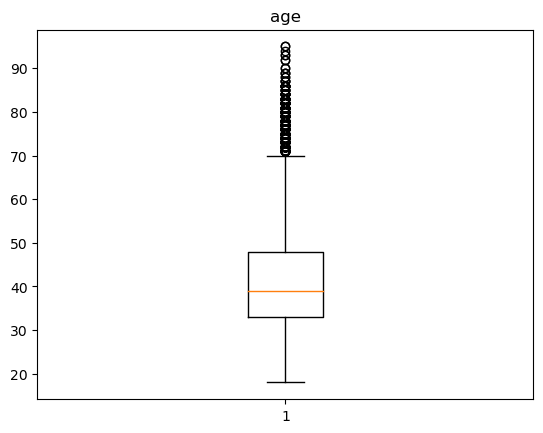

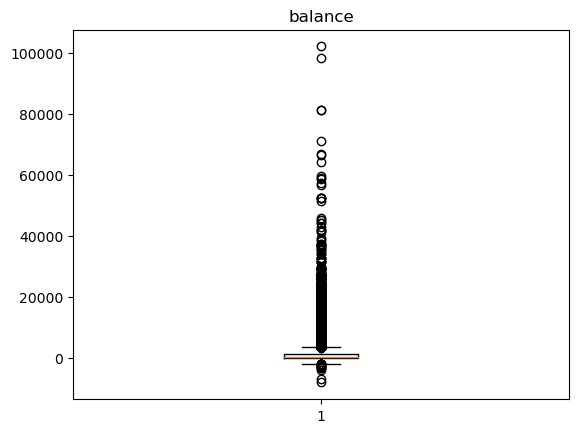

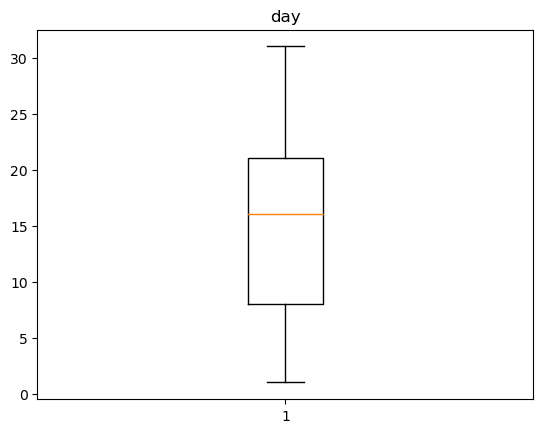

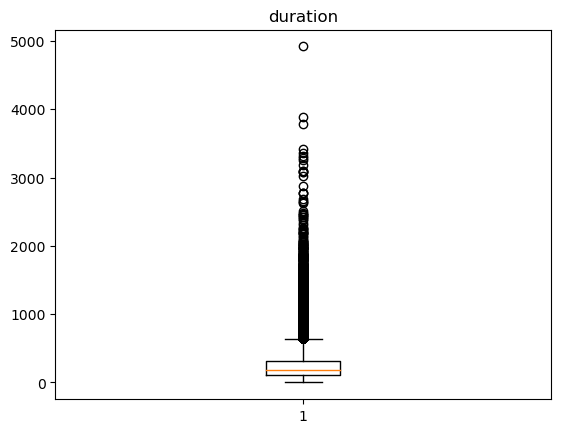

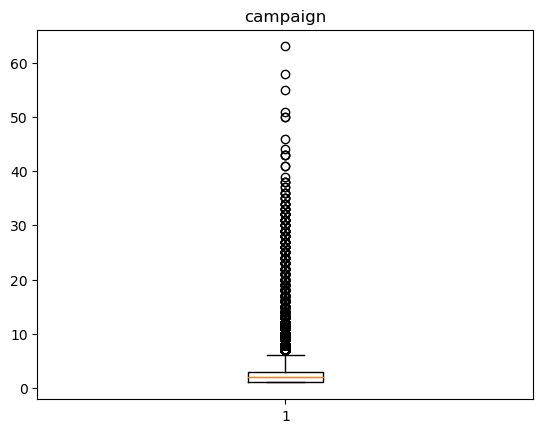

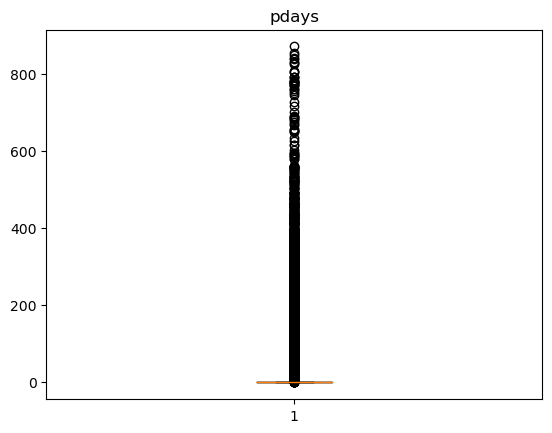

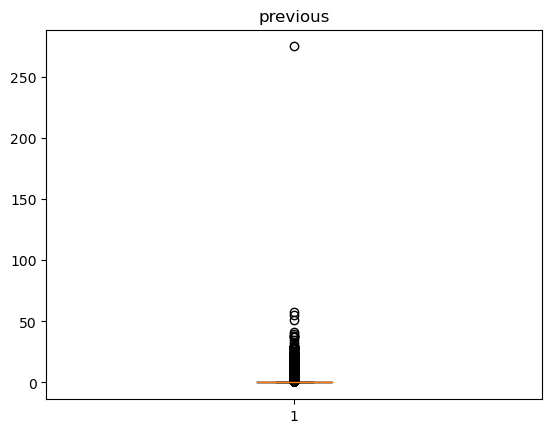

In [13]:
for col in numerical_features:
    fig, ax = plt.subplots()
    ax.boxplot(bank[col])
    ax.set_title(col)
    plt.show()

### There are more outliers

In [14]:
# Defineing Outlier treatment function
def Outlier_treatment(col_list):
    '''This function finding the first quantile,third quantile
    and IQR then treat the outliers the data point which is greater than upper
    limit we assign upper_limit value to that data point and the data point which
    is less than lower_limit we assign lower_limit value to that data point
    Parameters: List of columns'''
    for col in col_list:
        Q1 = bank[col].quantile(0.25)
        Q3 = bank[col].quantile(0.75)
        IQR = Q3 - Q1
        upper_limit = Q3 + 1.5*IQR
        lower_limit = Q1 - 1.5*IQR
        #bank[col] = bank[col].apply(lambda x: upper_limit if x > upper_limit else lower_limit if x < lower_limit else x)
        bank[col] = np.where(bank[col] < lower_limit, lower_limit,
                           np.where(bank[col] > upper_limit, upper_limit,bank[col]))
    return bank
Outlier_treatment(numerical_features)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58.0,management,married,tertiary,no,2143.0,yes,no,unknown,5.0,may,261.0,1.0,-1.0,0.0,unknown,0
1,44.0,technician,single,secondary,no,29.0,yes,no,unknown,5.0,may,151.0,1.0,-1.0,0.0,unknown,0
2,33.0,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5.0,may,76.0,1.0,-1.0,0.0,unknown,0
3,47.0,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5.0,may,92.0,1.0,-1.0,0.0,unknown,0
4,33.0,unknown,single,unknown,no,1.0,no,no,unknown,5.0,may,198.0,1.0,-1.0,0.0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51.0,technician,married,tertiary,no,825.0,no,no,cellular,17.0,nov,643.0,3.0,-1.0,0.0,unknown,1
45207,70.5,retired,divorced,primary,no,1729.0,no,no,cellular,17.0,nov,456.0,2.0,-1.0,0.0,unknown,1
45208,70.5,retired,married,secondary,no,3462.0,no,no,cellular,17.0,nov,643.0,5.0,-1.0,0.0,success,1
45209,57.0,blue-collar,married,secondary,no,668.0,no,no,telephone,17.0,nov,508.0,4.0,-1.0,0.0,unknown,0


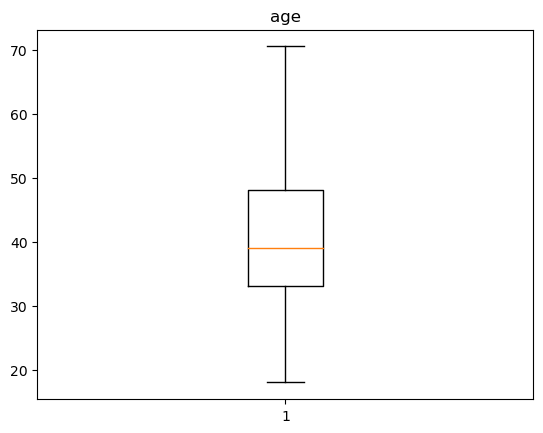

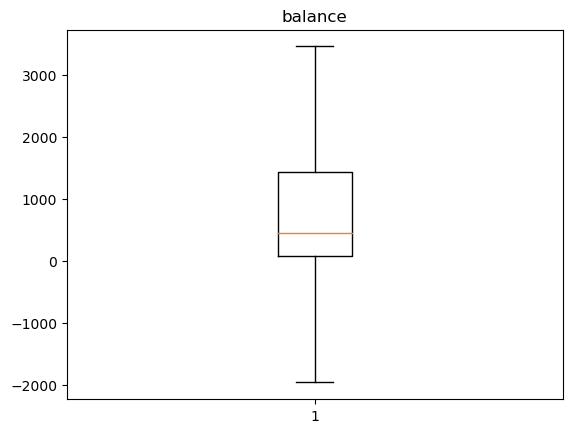

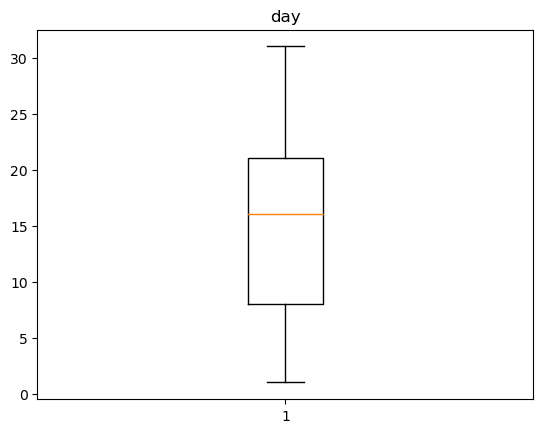

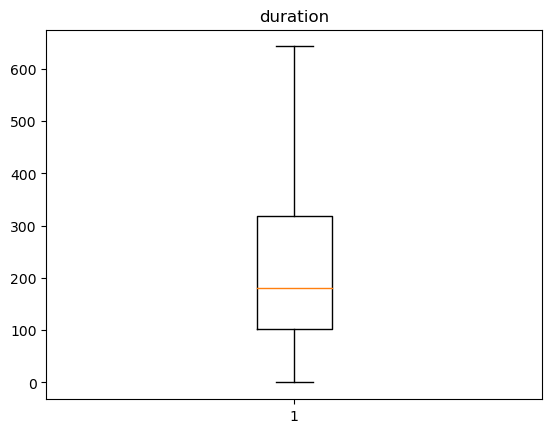

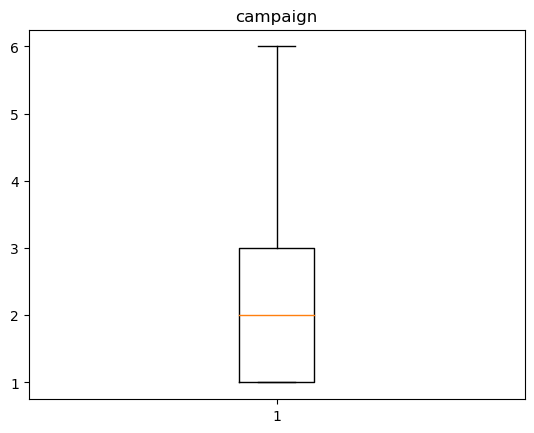

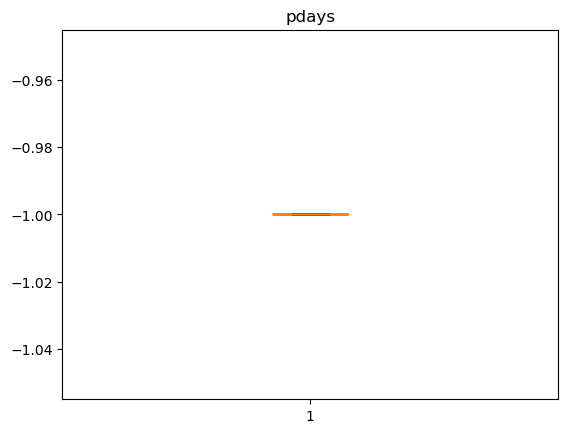

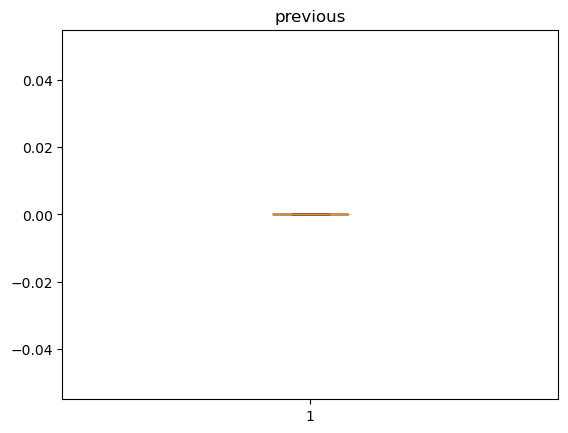

In [15]:
for col in numerical_features:
    fig, ax = plt.subplots()
    ax.boxplot(bank[col])
    ax.set_title(col)
    plt.show()

### NO outliers

### LETs explore the categorical data

In [16]:
for col in categorical_features:
    print(col)

job
marital
education
default
housing
loan
contact
month
poutcome


In [17]:
bank['job'].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

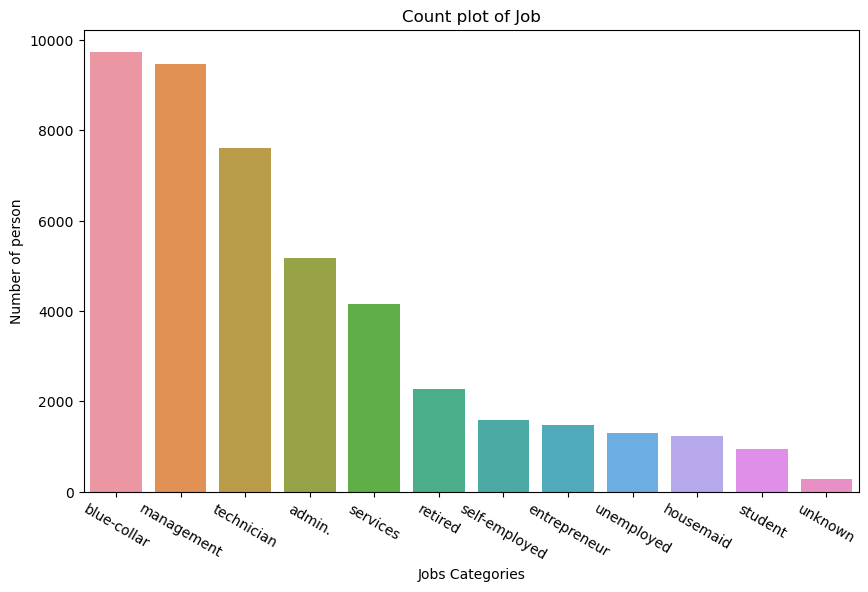

In [18]:
plt.figure(figsize=(10,6))
sns.barplot(x=bank['job'].value_counts().keys(),y=bank['job'].value_counts().values)
plt.title('Count plot of Job')
plt.xlabel('Jobs Categories')
plt.ylabel('Number of person')
plt.xticks(rotation=-30)
plt.show()

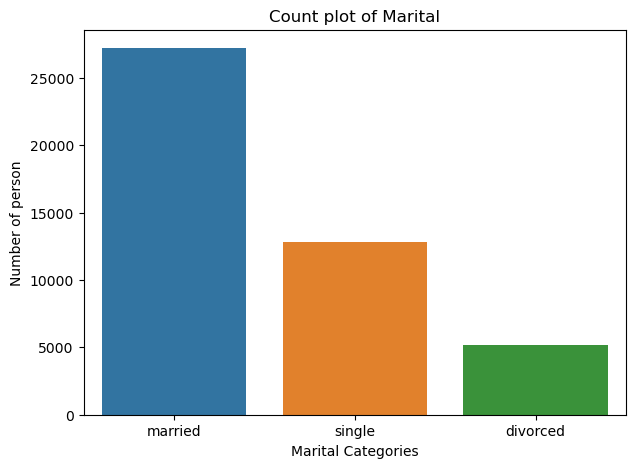

In [19]:
plt.figure(figsize=(7,5))
sns.barplot(x=bank['marital'].value_counts().keys(),y=bank['marital'].value_counts().values)
plt.title('Count plot of Marital')
plt.xlabel('Marital Categories')
plt.ylabel('Number of person')
plt.show()

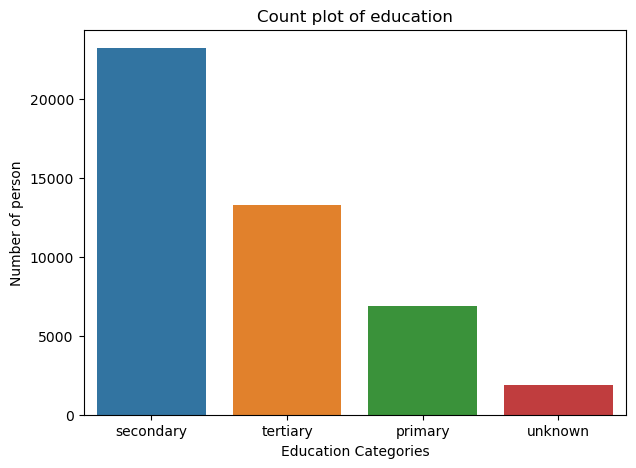

In [20]:
plt.figure(figsize=(7,5))
sns.barplot(x=bank['education'].value_counts().keys(),y=bank['education'].value_counts().values)
plt.title('Count plot of education')
plt.xlabel('Education Categories')
plt.ylabel('Number of person')
plt.show()

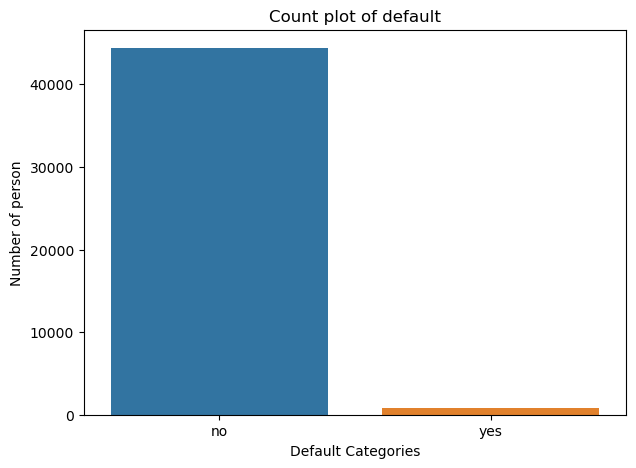

In [21]:
plt.figure(figsize=(7,5))
sns.barplot(x=bank['default'].value_counts().keys(),y=bank['default'].value_counts().values)
plt.title('Count plot of default')
plt.xlabel('Default Categories')
plt.ylabel('Number of person')
plt.show()

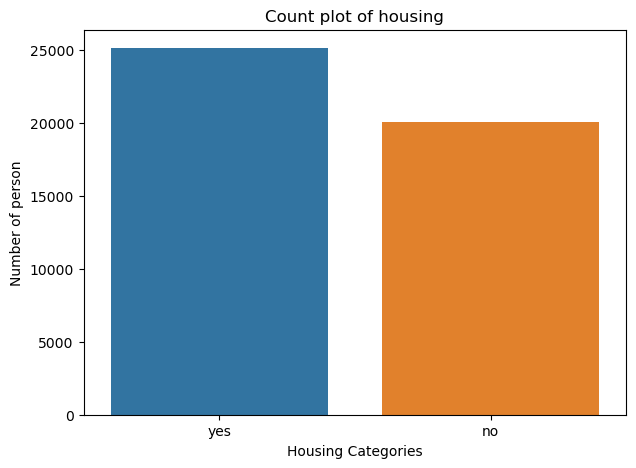

In [22]:
plt.figure(figsize=(7,5))
sns.barplot(x=bank['housing'].value_counts().keys(),y=bank['housing'].value_counts().values)
plt.title('Count plot of housing')
plt.xlabel('Housing Categories')
plt.ylabel('Number of person')
plt.show()

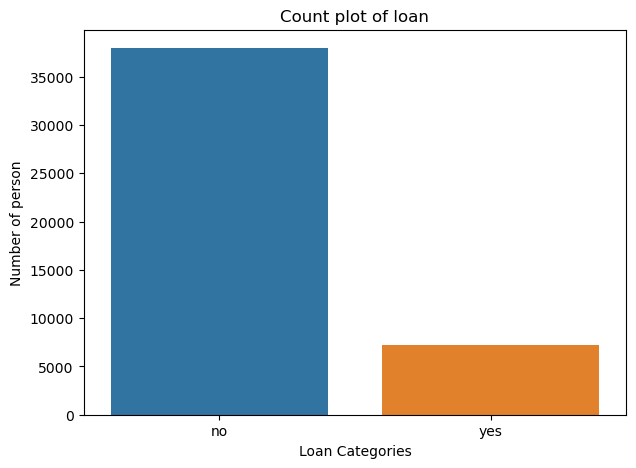

In [23]:
plt.figure(figsize=(7,5))
sns.barplot(x=bank['loan'].value_counts().keys(),y=bank['loan'].value_counts().values)
plt.title('Count plot of loan')
plt.xlabel('Loan Categories')
plt.ylabel('Number of person')
plt.show()

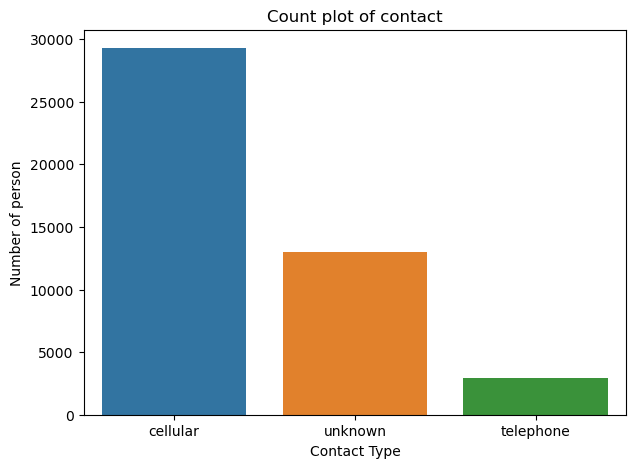

In [24]:
plt.figure(figsize=(7,5))
sns.barplot(x=bank['contact'].value_counts().keys(),y=bank['contact'].value_counts().values)
plt.title('Count plot of contact')
plt.xlabel('Contact Type')
plt.ylabel('Number of person')
plt.show()

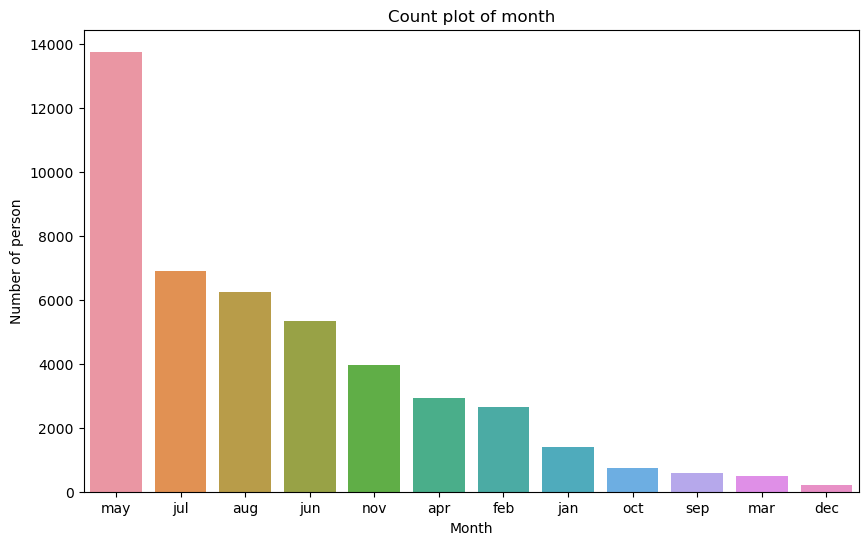

In [25]:
plt.figure(figsize=(10,6))
sns.barplot(x=bank['month'].value_counts().keys(),y=bank['month'].value_counts().values)
plt.title('Count plot of month')
plt.xlabel('Month')
plt.ylabel('Number of person')
plt.show()

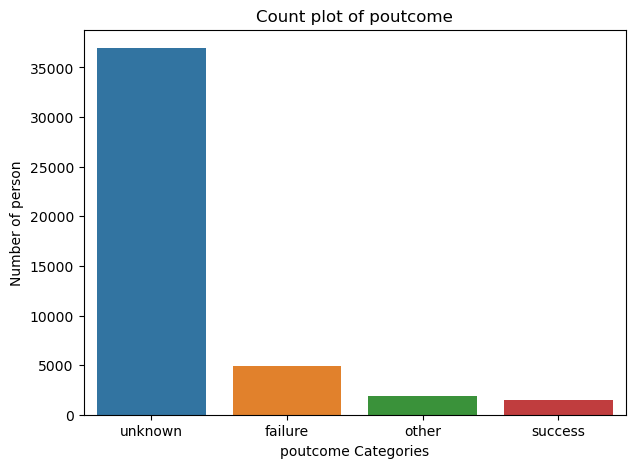

In [26]:
plt.figure(figsize=(7,5))
sns.barplot(x=bank['poutcome'].value_counts().keys(),y=bank['poutcome'].value_counts().values)
plt.title('Count plot of poutcome')
plt.xlabel('poutcome Categories')
plt.ylabel('Number of person')
plt.show()

## Let's convert categorical features into numerical.

In [27]:
categorical_features

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome']

In [28]:
from sklearn.preprocessing import OrdinalEncoder

In [29]:
oe = OrdinalEncoder(categories=[['unknown', 'student', 'housemaid', 'unemployed', 'retired', 'admin.', 'services', 
                                 'blue-collar', 'technician', 'self-employed', 'entrepreneur', 'management'],
                                ['single','married','divorced'],
                                ['unknown', 'primary', 'secondary', 'tertiary'],
                                ['no', 'yes'],
                                ['no', 'yes'],
                                ['no', 'yes'],
                                ['unknown', 'telephone', 'cellular'],
                                ['jan','feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov','dec'],
                                ['unknown', 'failure', 'other', 'success']
                                
                               ])

In [30]:
category_data = pd.DataFrame(oe.fit_transform(bank[categorical_features]))

In [31]:
category_data

,0,1,2,3,4,5,6,7,8
0,11.0,1.0,3.0,0.0,1.0,0.0,0.0,4.0,0.0
1,8.0,0.0,2.0,0.0,1.0,0.0,0.0,4.0,0.0
2,10.0,1.0,2.0,0.0,1.0,1.0,0.0,4.0,0.0
3,7.0,1.0,0.0,0.0,1.0,0.0,0.0,4.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0
...,...,...,...,...,...,...,...,...,...
45206,8.0,1.0,3.0,0.0,0.0,0.0,2.0,10.0,0.0
45207,4.0,2.0,1.0,0.0,0.0,0.0,2.0,10.0,0.0
45208,4.0,1.0,2.0,0.0,0.0,0.0,2.0,10.0,3.0
45209,7.0,1.0,2.0,0.0,0.0,0.0,1.0,10.0,0.0


### concat theboth DataFrames

In [32]:
bank_new = pd.concat([category_data,bank[numerical_features]],axis=1)

In [33]:
bank_new.head()

,0,1,2,3,4,5,6,7,8,age,balance,day,duration,campaign,pdays,previous
0,11.0,1.0,3.0,0.0,1.0,0.0,0.0,4.0,0.0,58.0,2143.0,5.0,261.0,1.0,-1.0,0.0
1,8.0,0.0,2.0,0.0,1.0,0.0,0.0,4.0,0.0,44.0,29.0,5.0,151.0,1.0,-1.0,0.0
2,10.0,1.0,2.0,0.0,1.0,1.0,0.0,4.0,0.0,33.0,2.0,5.0,76.0,1.0,-1.0,0.0
3,7.0,1.0,0.0,0.0,1.0,0.0,0.0,4.0,0.0,47.0,1506.0,5.0,92.0,1.0,-1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,33.0,1.0,5.0,198.0,1.0,-1.0,0.0


In [34]:
bank_new.rename(columns={0:'job',
 1:'marital',
 2:'education',
 3:'default',
 4:'housing',
 5:'loan',
 6:'contact',
 7:'month',
 8:'poutcome'},inplace = True)

In [35]:
bank_new.head()

,job,marital,education,default,housing,loan,contact,month,poutcome,age,balance,day,duration,campaign,pdays,previous
0,11.0,1.0,3.0,0.0,1.0,0.0,0.0,4.0,0.0,58.0,2143.0,5.0,261.0,1.0,-1.0,0.0
1,8.0,0.0,2.0,0.0,1.0,0.0,0.0,4.0,0.0,44.0,29.0,5.0,151.0,1.0,-1.0,0.0
2,10.0,1.0,2.0,0.0,1.0,1.0,0.0,4.0,0.0,33.0,2.0,5.0,76.0,1.0,-1.0,0.0
3,7.0,1.0,0.0,0.0,1.0,0.0,0.0,4.0,0.0,47.0,1506.0,5.0,92.0,1.0,-1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,33.0,1.0,5.0,198.0,1.0,-1.0,0.0


## Let's split dataset in train and test set.

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test = train_test_split(bank_new,bank['y'],test_size=0.2, random_state=42)

In [37]:
X_train.shape, X_test.shape,y_train.shape, y_test.shape

((36168, 16), (9043, 16), (36168,), (9043,))

In [38]:
from sklearn.linear_model import LogisticRegression

In [39]:
lr = LogisticRegression()

In [40]:
lr.fit(X_train,y_train)

LogisticRegression()

In [41]:
train_pred = lr.predict(X_train)
test_pred = lr.predict(X_test)

## Let's import metrices and test the model performance

In [42]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [43]:
accuracy_score(train_pred,y_train)

0.8903174076531741

In [44]:
accuracy_score(test_pred,y_test)

0.886431493973239

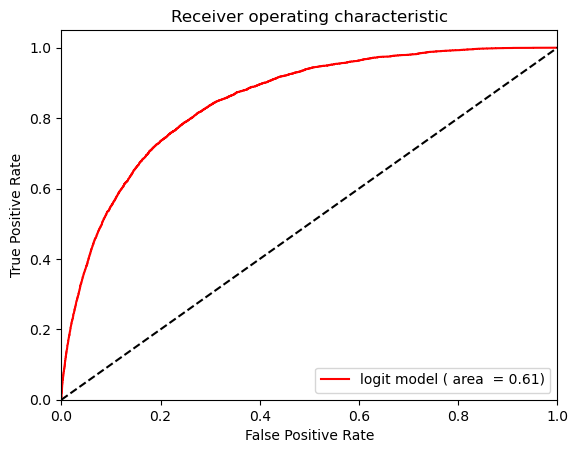

In [45]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(bank['y'], lr.predict_proba(bank_new)[:,1])

auc = roc_auc_score(y_test, test_pred)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()


## Let's do Hyperparameter tuning

In [46]:
from sklearn.model_selection import GridSearchCV

In [47]:
param = {
    'penalty':['l1', 'l2', 'elasticnet', None],
    'fit_intercept':[True,False],
    'solver':['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
}

In [48]:
clf = LogisticRegression()

In [49]:
grid = GridSearchCV(clf, param)

In [50]:
grid.fit(X_train,y_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'fit_intercept': [True, False],
                         'penalty': ['l1', 'l2', 'elasticnet', None],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga']})

In [51]:
grid.best_params_

{'fit_intercept': True, 'penalty': 'l2', 'solver': 'newton-cg'}

In [52]:
grid.best_score_

0.8942989005977082

## Let's build the model with best hyperparameter

In [53]:
model = LogisticRegression(fit_intercept=True, penalty='l2',solver='liblinear')

In [54]:
model.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [55]:
test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

In [56]:
accuracy_score(y_train, train_pred)

0.8944370714443707

In [57]:
accuracy_score(y_test, test_pred)

0.8882008183125069

Since accuracy score for train and test data is almost same that's why our model is not overfitted.

In [58]:
confusion_matrix(y_test, test_pred)

array([[7724,  228],
       [ 783,  308]], dtype=int64)

In [59]:
print(classification_report(y_test, test_pred))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94      7952
           1       0.57      0.28      0.38      1091

    accuracy                           0.89      9043
   macro avg       0.74      0.63      0.66      9043
weighted avg       0.87      0.89      0.87      9043



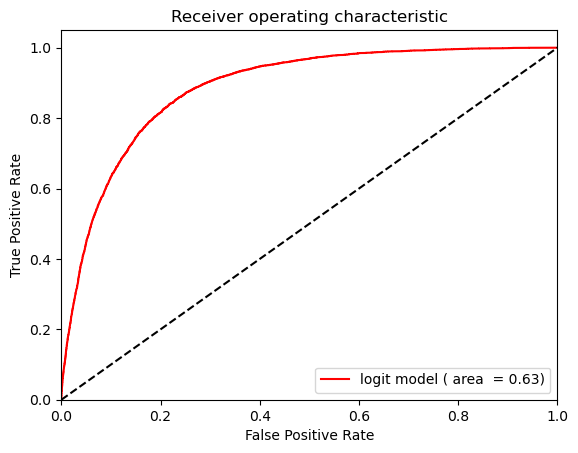

In [60]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(bank['y'], model.predict_proba(bank_new)[:,1])

auc = roc_auc_score(y_test, test_pred)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()


## Let's try with different scaled data

### 1. Standard Scaler

In [61]:
from sklearn.preprocessing import StandardScaler

In [62]:
scale = StandardScaler()

In [63]:
 X_train_std = scale.fit_transform(X_train)

In [64]:
X_test_std = scale.fit_transform(X_test)

In [65]:
X_train_std[:1]

array([[-0.10360977,  0.27668031, -1.36194069, -0.13811321,  0.8923425 ,
        -0.43859406, -1.51749174, -0.47590988, -0.4157906 ,  0.01307131,
        -0.07150982, -0.09821817, -0.91984814, -0.86898946,  0.        ,
         0.        ]])

In [66]:
X_test_std[:1]

array([[-0.11358445,  0.27211945, -0.08989227, -0.12448659,  0.90022798,
        -0.42961498, -1.50168371, -0.47312781, -0.41327802, -0.08522127,
        -0.30453881,  0.02874778, -0.25955267, -0.87451125,  0.        ,
         0.        ]])

In [67]:
# build the model
lr_std = LogisticRegression(fit_intercept=True, penalty='l2',solver='liblinear')

In [68]:
lr_std.fit(X_train_std, y_train)

LogisticRegression(solver='liblinear')

In [69]:
test_pred = lr_std.predict(X_test_std)

In [70]:
train_pred = lr_std.predict(X_train_std)

In [71]:
print(f'accuracy_score of test data: {accuracy_score(y_test, test_pred)}')

accuracy_score of test data: 0.8899701426517749


In [72]:
print(f'accuracy_score for train data: {accuracy_score(y_train, train_pred)}')

accuracy_score for train data: 0.8942988276929883


In [73]:
confusion_matrix(y_test, test_pred)

array([[7748,  204],
       [ 791,  300]], dtype=int64)

In [74]:
print(classification_report(y_test, test_pred))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94      7952
           1       0.60      0.27      0.38      1091

    accuracy                           0.89      9043
   macro avg       0.75      0.62      0.66      9043
weighted avg       0.87      0.89      0.87      9043



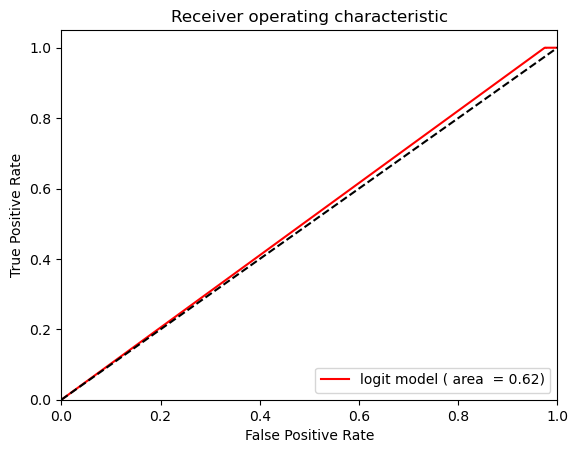

In [75]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(bank['y'], lr_std.predict_proba (bank_new)[:,1])

auc = roc_auc_score(y_test, test_pred)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'% auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()


### 2. MinMax Scaler

In [76]:
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()

In [77]:
X_train_minmax = minmax.fit_transform(X_train)
X_test_minmax = minmax.transform(X_test)

In [78]:
# Build the model
lr_minmax = LogisticRegression(fit_intercept=True, penalty='l2',solver='liblinear')

In [79]:
lr_minmax.fit(X_train_minmax, y_train)

LogisticRegression(solver='liblinear')

In [80]:
# Make prediction
test_pred = lr_minmax.predict(X_test_minmax)
train_pred = lr_minmax.predict(X_train_minmax)

In [81]:
print(f'accuracy_score of test data: {accuracy_score(y_test, test_pred)}')

accuracy_score of test data: 0.8882008183125069


In [82]:
print(f'accuracy_score for train data: {accuracy_score(y_train, train_pred)}')

accuracy_score for train data: 0.8942988276929883


In [83]:
confusion_matrix(y_test, test_pred)

array([[7724,  228],
       [ 783,  308]], dtype=int64)

In [84]:
print(classification_report(y_test, test_pred))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94      7952
           1       0.57      0.28      0.38      1091

    accuracy                           0.89      9043
   macro avg       0.74      0.63      0.66      9043
weighted avg       0.87      0.89      0.87      9043



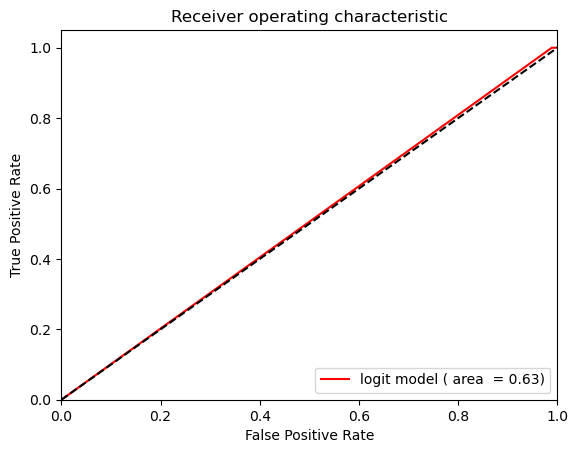

In [85]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(bank['y'], lr_minmax.predict_proba(bank_new)[:,1])

auc = roc_auc_score(y_test, test_pred)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()


### 3. Normalizer

In [86]:
from sklearn.preprocessing import Normalizer

In [87]:
norm = Normalizer()

In [88]:
X_train_norm = norm.fit_transform(X_train)
X_test_norm = norm.transform(X_test)

In [89]:
## Build the model
lr_norm = LogisticRegression(fit_intercept=True, penalty='l2',solver='liblinear')

In [90]:
lr_norm.fit(X_train_norm, y_train)

LogisticRegression(solver='liblinear')

In [91]:
## Make prediction
test_pred = lr_norm.predict(X_test_norm)
train_pred = lr_norm.predict(X_train_norm)

In [92]:
print(f'accuracy_score of test data: {accuracy_score(y_test, test_pred)}')

accuracy_score of test data: 0.8793541966161672


In [93]:
print(f'accuracy_score for train data: {accuracy_score(y_train, train_pred)}')

accuracy_score for train data: 0.8839305463393055


In [94]:
confusion_matrix(y_test, test_pred)

array([[7952,    0],
       [1091,    0]], dtype=int64)

In [95]:
print(classification_report(y_test, test_pred))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94      7952
           1       0.00      0.00      0.00      1091

    accuracy                           0.88      9043
   macro avg       0.44      0.50      0.47      9043
weighted avg       0.77      0.88      0.82      9043



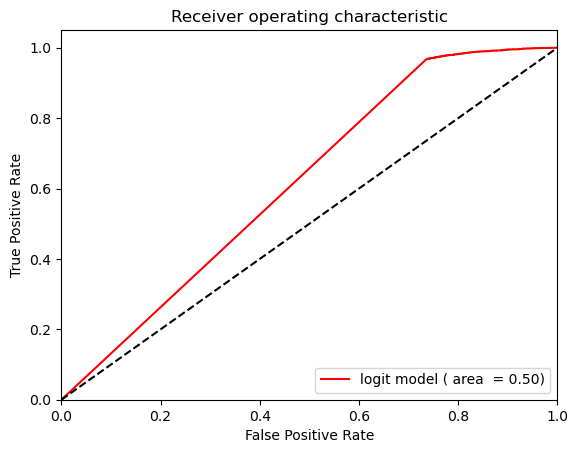

In [96]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(bank['y'], lr_norm.predict_proba(bank_new)[:,1])

auc = roc_auc_score(y_test, test_pred)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()


### 4. Divide by Maximum

In [97]:
X_test_maxdiv = X_test/(X_test.max()+0.001)

In [98]:
X_train_maxdiv = X_train/(X_train.max()+0.001)

In [99]:
X_test_maxdiv.head()

,job,marital,education,default,housing,loan,contact,month,poutcome,age,balance,day,duration,campaign,pdays,previous
3776,0.636306,0.49975,0.666445,0.0,0.999001,0.000000,0.0000,0.363603,0.000000,0.567368,0.167533,0.516112,0.298600,0.166639,1.001001,0.0
9928,0.545405,0.00000,0.666445,0.0,0.000000,0.000000,0.0000,0.454504,0.000000,0.666657,1.000000,0.290313,0.129082,0.333278,1.001001,0.0
33409,0.090901,0.00000,0.999667,0.0,0.999001,0.000000,0.9995,0.272702,0.000000,0.354605,0.155401,0.645140,0.351477,0.166639,1.001001,0.0
31885,0.999909,0.49975,0.999667,0.0,0.000000,0.000000,0.9995,0.272702,0.333222,0.595736,0.512132,0.290313,0.483670,0.166639,1.001001,0.0
15738,0.999909,0.49975,0.999667,0.0,0.000000,0.999001,0.9995,0.545405,0.000000,0.794315,0.062681,0.677398,0.188180,0.333278,1.001001,0.0


In [100]:
X_train_maxdiv.head()

,job,marital,education,default,housing,loan,contact,month,poutcome,age,balance,day,duration,campaign,pdays,previous
3344,0.636306,0.49975,0.333222,0.0,0.999001,0.0,0.0000,0.363603,0.0,0.581552,0.245234,0.483855,0.111975,0.166639,1.001001,0.0
17965,0.727207,0.49975,0.333222,0.0,0.999001,0.0,0.9995,0.545405,0.0,0.695026,0.408723,0.967711,0.418351,0.333278,1.001001,0.0
18299,0.454504,0.49975,0.666445,0.0,0.000000,0.0,0.9995,0.545405,0.0,0.595736,1.000000,0.999968,0.202177,0.666556,1.001001,0.0
10221,0.999909,0.00000,0.999667,0.0,0.999001,0.0,0.0000,0.454504,0.0,0.524815,-0.034373,0.354827,0.583203,0.999833,1.001001,0.0
32192,0.636306,0.49975,0.333222,0.0,0.000000,0.0,0.9995,0.272702,0.0,0.794315,1.000000,0.483855,0.410575,0.333278,1.001001,0.0


In [101]:
## Build the model
lr_maxdiv = LogisticRegression(fit_intercept=True, penalty='l2',solver='liblinear')

In [102]:
lr_maxdiv.fit(X_train_maxdiv, y_train)

LogisticRegression(solver='liblinear')

In [103]:
## Make prediction
test_pred = lr_maxdiv.predict(X_test_maxdiv)
train_pred = lr_maxdiv.predict(X_train_maxdiv)

In [104]:
print(f'accuracy_score of test data: {accuracy_score(y_test, test_pred)}')

accuracy_score of test data: 0.8879796527700984


In [105]:
print(f'accuracy_score for train data: {accuracy_score(y_train, train_pred)}')

accuracy_score for train data: 0.8942988276929883


In [106]:
confusion_matrix(y_test, test_pred)

array([[7723,  229],
       [ 784,  307]], dtype=int64)

In [107]:
print(classification_report(y_test, test_pred))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94      7952
           1       0.57      0.28      0.38      1091

    accuracy                           0.89      9043
   macro avg       0.74      0.63      0.66      9043
weighted avg       0.87      0.89      0.87      9043



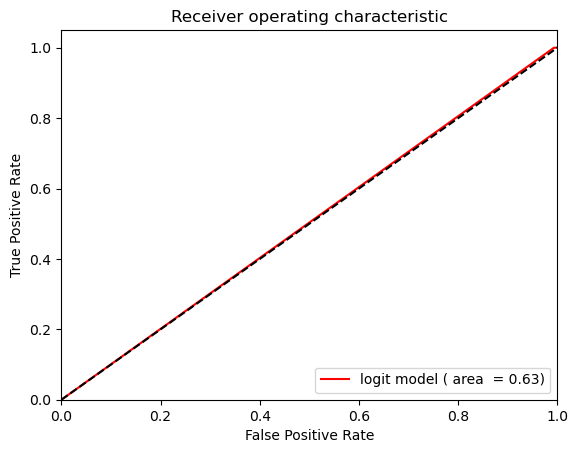

In [108]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(bank['y'], lr_maxdiv.predict_proba(bank_new)[:,1])

auc = roc_auc_score(y_test, test_pred)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()


## Conclusion

* In this dataset I found huge numbers of outliers since Logistic Regression is sensitive tooutliers tha's why I treated them by cappping method.
* I found two types of features 1. Numerical and 2. Categorical so, I convert Categorical variable in to numerical with the help of Ordinal Encoder.
* I have found best possible hyperparameters with the help of GridSearchCV and apply them for building the model.
* Then train the model with different Scaled dataset.
* I got the best result when I trained the model with Standard Scaled dataset.